# REGRESSION PAR DISCONTINUITE

Cette application utilise les données de l'article de Basten et Betz (2013) : "Beyond Work Ethic: Religion, Individual, and Political Preferences", *American Economic Journal: Economic Policy*, 5(3):67-91.

En 1904, Max Weber, dans son célèbre ouvrage L'éthique protestante et l'esprit du capitalisme (1904), situe l'essor du capitalisme dans la religion protestante. Selon son texte, à l'origine, la religion protestante voit dans l'enrichissement personnel le signe de l'élection divine. Cette recherche du signe électif par les protestants serait à l'origine d'une éthique bien particulière du travail, fondée sur l'effort, l'accumulation et le mérite personnel.

On veut tester si la religion protestante a vraiment un impact sur l'éthique du travail (= l'importance donnée à l'effort au travail). 

Pour identifier l'effet causal du protestantisme sur l’éthique du travail, on s'intéresse au cas de la Suisse , au sein de laquelle coexistent des religions majoritaires différentes dans les différents cantons : protestantisme, ou catholicisme.

# 1. Introduction

De manière générale, pourquoi est-il très difficile de mesurer l'impact causal d'une religion sur un résultat économique ? 

<font color=green> Corrigé : une religion n'est pas assignée aléatoirement, ce qui fait que les individus des autres religions ou les athées sont de très mauvais contrefactuels de ce qui se serait passé pour un individu s'il n'avait pas eu cette religion. Nous allons voir comment les auteurs abordent cette question. <font>


# 2 Données

On ouvre les donnée : **TD11_weber.dta** :

In [1]:
library(foreign)
d<-read.dta("TD11_weber.dta")
head(d)

Warning message in read.dta("TD11_weber.dta"):
"value labels ('canton') for 'canton' are missing"

id,name,canton,prot_share,vaud,borderdis,v_borderdis,pfl,altitude,income
2135,Gruyères,10,0.06225060,0,-14.5,0.0,42.72250,802,59.16423
2128,Châtel-sur-Montsalvens,10,0.05319149,0,-15.9,0.0,49.22375,909,51.38816
2127,Charmey,10,0.02842377,0,-11.8,0.0,41.08750,886,53.85605
2125,Bulle,10,0.05396654,0,-15.9,0.0,47.32625,763,58.61113
2124,Broc,10,0.05737235,0,-17.5,0.0,49.79625,713,56.91030
5843,Rougemont,22,0.89793283,1,12.6,12.6,34.00250,1001,57.82932


Voici le *codebook* :
![](TD11_codebook.png)

Quel est le niveau d'observation de la base de données (= à quoi correspond chaque ligne de la base de données) : individu ? municipalité ? canton ? pays ?

<font color=green> Corrigé : Les chercheurs ne connaissent pas le vote individuel à ces propositions (secret), ils se placent donc au niveau des municipalités. <font>

Quelle est la mesure de la religion ? Comment peut-on mesurer l'éthique du travail ? 

<font color=green> Corrigé : *prot1980s* et *pfl*. 

**A)	Mesure de l’éthique/l’effort au travail** 
On utilise les résultats moyens obtenus au cours de référendums sur le temps de travail (préférence pour le loisir : un haut résultat obtenu dans la municipalité signifiera une plus forte préférence pour le loisir – donc une plus faible préférence pour l’effort au travail). C'est la variable *plf*. Par exemple, si plf=40 dans la municipalité i cela veut dire que 40% des votants ont voté en faveur d’une loi qui favorise le temps de loisir (donc en défaveur du temps de travail) dans cette municipalité. 

**B)	Mesure de la religion**
La Suisse est organisée en cantons. Chaque canton contient de nombreuses municipalités. En Suisse coexistent des religions majoritaires différentes dans les différents cantons : protestantisme, ou catholicisme. On observe la part de protestants de chaque municipalité.
</font>

Produire un graphique mettant en relation cette mesure de la religion (absisse) avec la mesure de préférence pour le loisir (ordonnée).

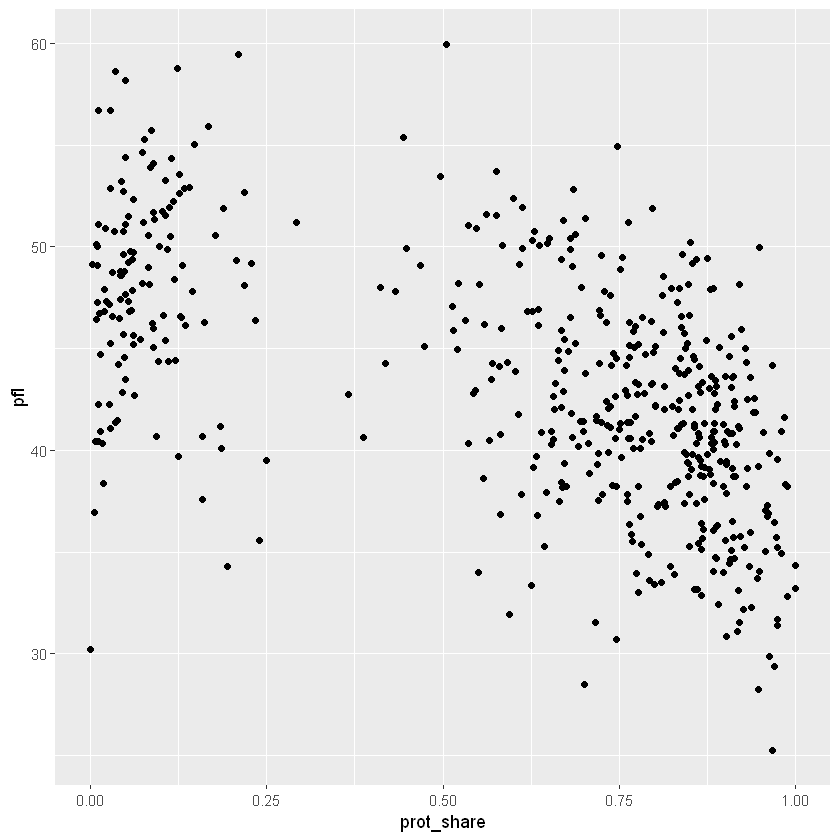

In [2]:
library(ggplot2)
ggplot(d, aes(x=prot_share,y=pfl))+geom_point()

Que constate-t-on ? Est-ce compatible avec la théorie de Weber selon laquelle les protestants ont une plus forte éthique du travail ?

<font color=green>
Plus la part de protestants est importante dans la municipalité, plus le vote en faveur des mesures pro-loisirs est faible. Totalement en lien avec la théorie de Weber. 
<font>

# 3. Stratégie d'identification

Pour nous aider à définir une stratégie, voilà ce que nous savons sur la religion des différents cantons en Suisse : 

- Les cantons les plus ruraux et montagneux sont catholiques, les cantons les plus urbains sont protestants.
- Les cantons germanophones sont protestants, les cantons francophones et italophones sont catholiques. 
- Les cantons qui étaient corporatistes (plus de mobilité sociale) ont plutôt choisi le protestantisme, les cantons avec aristocratie sont restés catholiques. 

Les auteurs pensent d'abord à comparer les préférences des municipalités suisses en fonction de leur pourcentage de protestants. Pourquoi est-ce une mauvaise idée ? 

<font color=green>
Correction : 

Les cantons qui ont choisi la religion catholique ne sont certainement pas les mêmes que ceux qui ont choisi la religion protestante (ce qu'on voit ci-dessus : plus montagneux, francophones, artistocratiques...). 

De ce fait, les résultats des catholiques ne sont probablement pas égaux à ceux qu'auraient obtenus les protestants s'ils avaient été catholiques. Autrement dit, les catholiques sont un mauvais groupe pour estimer le contrefactuel inobservé des protestants, à savoir quelles seraient leurs préférences s'ils avaient été catholiques. 

On pourrait contrôler pour ces variables, mais il y aurait certainement d'autres caractéristiques inobservables qui poseraient souci et biaiseraient l'estimation.
</font>

Dans le sud-est de la Suisse d'aujourd'hui, il existe une région francophone homogène avant 1530, qui perd un conflit et se trouve partagée en deux : 

- une partie intègre un canton catholique : canton de Fribourg (127 municipalités), 
- une autre intègre de force un canton protestant : canton de Vaud (382 municipalités). 

a) Quelle stratégie d'identification proposeriez-vous ? 

<font color=green> Le canton homogène scindé en deux après 1530 apparaît proposer une bonne quasi expérience : les municipalités catholiques et protestants sont un bon contrefactuel l'un de l'autre. Il apparaît que la religion est le fruit d'un hasard, comme si elle était assignée aléatoirement. 
</font>

b) Quel est alors le traitement ? La variable dépendante ? 

<font color=green> 
Corrigé : traitement = le fait pour une municipalité d'appartenir aujourd'hui à une région déclarée protestante en 1530 (D=1). Variable dépendante : le résultat municipal moyen pour les referenda en faveur de la préférence pour le loisir.
</font>

c) Quand a eu lieu l'assignation au traitement ? A priori, l'adhésion est-elle parfaite ? 

<font color=green> 
    Corrigé : L'assignation a eu lieu en 1530. L'adhésion n'est pas parfaite, car on ne peut pas forcer par décret à ce que 100% de la municipalité change une religion de coeur ! De plus depuis ce temps il y a eu de la migration. On peut mesurer un effet d'intention de traiter, mais il faudra réévaluer l'effet sur les traités en rapportant l'ITT à la proportion d'individus ayant réellement suivi le traitement, à savoir la part des protestants dans les régions assignées au protestantisme aujourdhui.
    </font>

d) En conséquence, quel modèle estimeriez vous, avec quel estimateur ?

<font color=green> Comme il s'agit d'une expérience naturelle on pourrait imaginer un modèle assez simple. 
    
<font color=green> - Si l'adhésion était parfaite une régression simple suffirait.</font>
    
<font color=green> - Comme l'adhésion est imparfaite, on instrumente plutôt la part de protestants par le traitement *Vaud*.  </font>
</font>

e) Il s'avère que nos données **TD11_weber** se concentrent justement déjà sur l'ensemble des municipalités du canton de Vaud et de Fribourg. Estimer le modèle que vous proposez. 

In [3]:
##si l'éadhésion avait été parfaite : 
#simple2<-lm(pfl~vaud,data=d)
#summary(simple2)

#comme l'adhésion est imparfaite : 
library(AER)
iv<-ivreg(pfl~prot_share|vaud,data=d)
summary(iv)

Loading required package: car
Loading required package: carData
Loading required package: lmtest
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival



Call:
ivreg(formula = pfl ~ prot_share | vaud, data = d)

Residuals:
      Min        1Q    Median        3Q       Max 
-18.61913  -3.23399   0.02584   3.25861  15.83714 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  48.8254     0.5039   96.90   <2e-16 ***
prot_share   -9.3273     0.7423  -12.56   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.003 on 507 degrees of freedom
Multiple R-Squared: 0.303,	Adjusted R-squared: 0.3016 
Wald test: 157.9 on 1 and 507 DF,  p-value: < 2.2e-16 


# 3. Estimation : régression par discontinuité

Les chercheurs remarquent que malgré leur homogénéité de prime abord, les cantons de Fribourg et Vaud ont quand même des différences géographiques : l'un est plus montagneuse que l'autre. Or historiquement les régions montagneuses sont plus égalitaires en Suisse. Ceci pourrait biaiser les résultats. 

Les auteurs décident d'affiner encore leur stratégie et de se concentrer sur la frontière entre ces deux régions, et proposent une **régression par discontinuité spatiale**. 

### 3.1 Questions préliminaires

Quel est le principe d'identification ?

<font color=green> 
The assignment of Protestantism in the 16th century and therefore also the "treatment" of present-day Protestantism **change discontinuously at the historical religious border**, whereas **the confounding factors described above can be expected to change only continuously**. 
    
 This allows us to identify the **causal effect** of Protestantism as the discontinuous change in outcomes at this border, while controlling with sufficient flexibility for the **effect correlated with the forcing variable, distance from the border per se**.
</font>

Quel est le seuil ? Quelle est la running variable ? Définir une fenêtre de votre choix autour du seuil. 

<font color=green> 
Corrigé : seuil= frontière, running variable = distance à la frontière. Pour la fenêtre autour du seuil, on pourrait la faire varier mais on va considérer seulement les municipalités qui se ressemblent le plus : celles qui se trouvent à moins de 10km de part et d'autre de la frontière. 
</font>

### 3.2 Sharp design

On suppose d'abord que l'adhésion est parfaite : on imagine que les municipalités d'un côté de la frontière sont toutes à 100% protestantes, et de l'autre à 100% catholiques.

On va donc estimer un modèle de régression par discontinuité *sharp*. On commence par l'estimer séparément d'un côté et de l'autre du seuil. 

In [5]:
vaud0<-lm(pfl~borderdis,data=d[d$vaud==0 & d$borderdis<10 & d$borderdis>-10,])
vaud1<-lm(pfl~borderdis,data=d[d$vaud==1 & d$borderdis<10 & d$borderdis>-10,])

Puis on utilise les coefficients estimés pour calculer l'effet du protestantisme sur la préférence pour le loisir : 

In [6]:
effet<-coef(vaud1)[1]-coef(vaud0)[1]
effet

(Intercept) 
  -8.683722

Retrouvez ce même résultat en estimant le modèle en une seule équation.

In [7]:
rdd_sharp<-lm(pfl~vaud+borderdis+vaud:borderdis,data=d[d$borderdis<10&d$borderdis>-10,])
summary(rdd_sharp)


Call:
lm(formula = pfl ~ vaud + borderdis + vaud:borderdis, data = d[d$borderdis < 
    10 & d$borderdis > -10, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0670  -3.5575  -0.0245   3.5667  11.7971 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    48.20300    1.07892  44.677  < 2e-16 ***
vaud           -8.68372    1.37675  -6.307 1.74e-09 ***
borderdis      -0.02057    0.21093  -0.098    0.922    
vaud:borderdis  0.09283    0.27015   0.344    0.731    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.27 on 203 degrees of freedom
Multiple R-squared:  0.3834,	Adjusted R-squared:  0.3743 
F-statistic: 42.07 on 3 and 203 DF,  p-value: < 2.2e-16


Conclure.

<font color=green> Le fait qu'une municipalité soit protestante plutôt que catholique cause une baisse du score des referendums de préférence pour le loisir de 8.7 points. </font>

### 3.3 Fuzzy design

On sait que l'adhésion est imparfaite : en réalité, le design est *fuzzy*. Les communes nes sont pas toutes à 100% protestantes ou catholiques selon le côté de la frontière. Sachant cela, qu'a-t-on en fait estimé en 3.2 ? 

<font color=green>  Ce qu'on a estimé ci-dessus est en fait l'ITT (lintention de traitement, l'effet de l'assignation sans tenir compte du fait que l'adhésion a été imparfaite ensuite). 
 
On peut aussi dire *forme réduite*, c'est la même chose que l'ITT.  </font>

Estimer le modèle de régression fuzzy.

In [8]:
library(AER)
rdd_fuzzy<-ivreg(pfl~prot_share+borderdis+vaud:borderdis|vaud+borderdis+vaud:borderdis,data=d[d$borderdis<10&d$borderdis>-10,])
summary(rdd_fuzzy)


Call:
ivreg(formula = pfl ~ prot_share + borderdis + vaud:borderdis | 
    vaud + borderdis + vaud:borderdis, data = d[d$borderdis < 
    10 & d$borderdis > -10, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8531  -3.2445  -0.0037   3.4915  12.4784 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     49.403576   1.169429  42.246  < 2e-16 ***
prot_share     -11.954109   1.796416  -6.654 2.59e-10 ***
borderdis       -0.008322   0.201142  -0.041    0.967    
borderdis:vaud   0.082990   0.256343   0.324    0.746    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.995 on 203 degrees of freedom
Multiple R-Squared: 0.446,	Adjusted R-squared: 0.4378 
Wald test: 46.83 on 3 and 203 DF,  p-value: < 2.2e-16 


Conclure. 

<font color=green> *Note : prot_share est comprise entre 0 et 1, tandis que lpf est comprise entre 0 et 100.* 
    
Littéralement, une hausse de *prot_share* d'une unité a pour conséquence une baisse de *lpf* de 12. En y mettant un peu de sens : 
    
Si une municipalité catholique avait été plutôt déclarée protestante 500 ans auparavant, son score aux référenda pro loisir serait de 12 point inférieur à ce qu'il est actuellement. </font>

# 4. Analyse graphique

Grâce au cours, on sait que les régressions par discontinuité sont particulièrement parlantes lorsqu'on présente les résultats graphiquement. 

1) Que permet de montrer le graphique issu du code ci-dessous ?

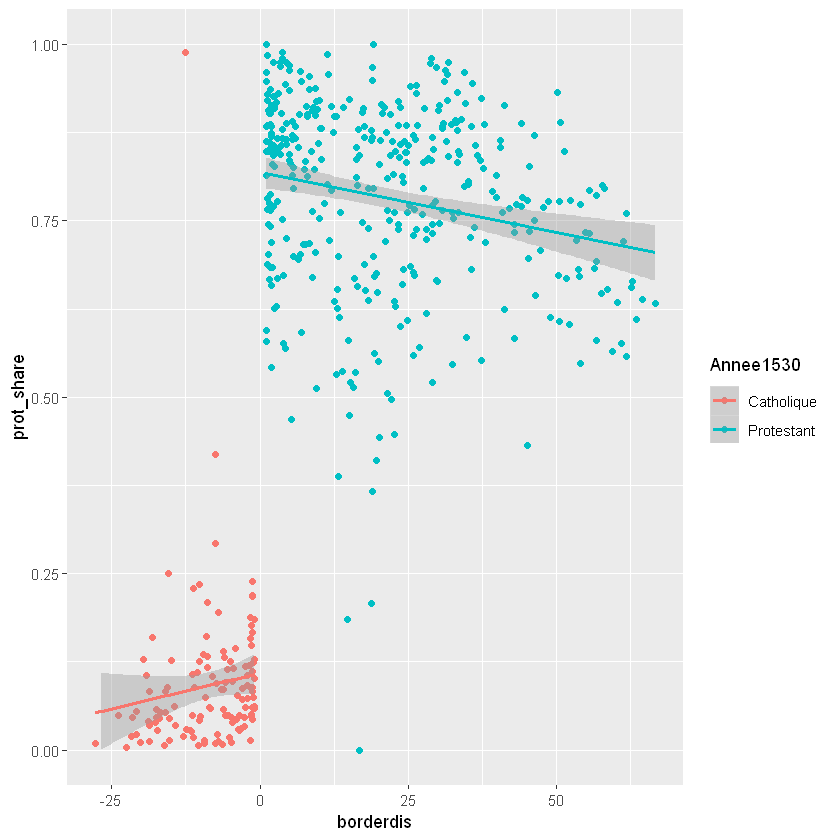

In [9]:
library(ggplot2)
d$Annee1530<-factor(d$vaud)
levels(d$Annee1530)<-c("Catholique","Protestant")

ggplot(d, aes(x = borderdis, y = prot_share,colour=Annee1530)) + 
  geom_point() + ylim(0,1) + stat_smooth(method = "lm")

<font color=green> Il nous montre que l'adhésion est imparfaite mais tout de même forte. The results testify to the strong persistence of religion. Municipalities where in 1536 Berne had imposed Protestantism had a 65 to 71 percentage points higher share of Protestants in 1980, almost 450 years after the initial assignment. (En terme de variable instrumentale : la réforme est bon instrument de la part des protestants dans la société aujourdhui. )</font>


2) Produire un graphique dans le même esprit pour montrer l'effet de la décision de 1530 sur les scores aux référendas des différentes municipalités (=l'effet d'intention de traiter).

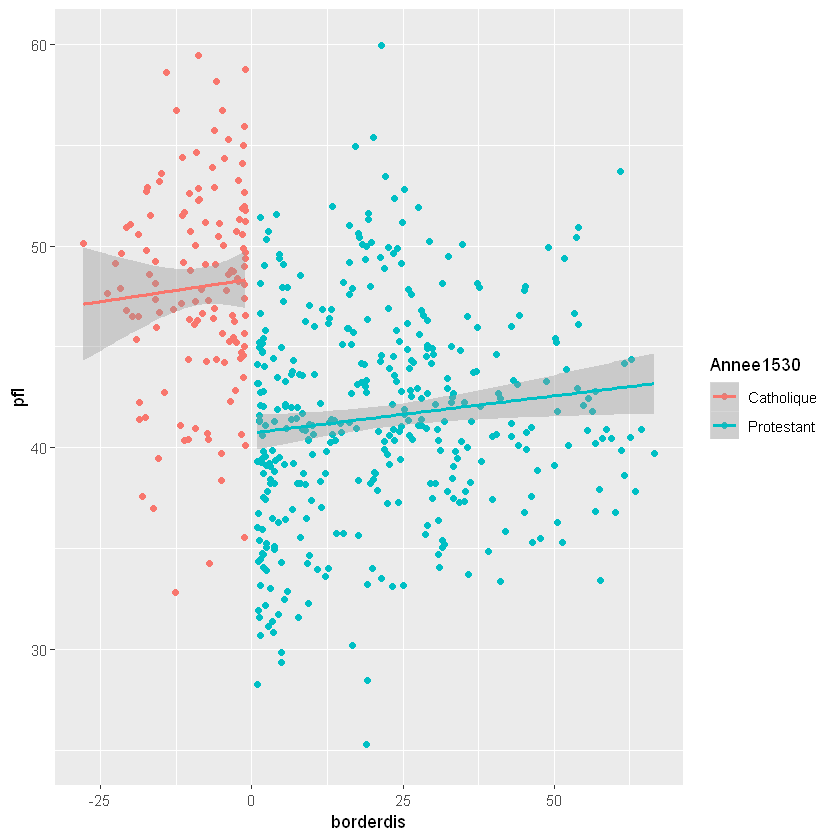

In [10]:
ggplot(d, aes(x = borderdis, y = pfl,colour=Annee1530)) + 
  geom_point() + ylim(25,60) + stat_smooth(method = "lm")

3) Quel serait l'intérêt de produire le même graphique que (2) mais en remplaçant l'outcome et en utilisant des variables de contrôle à sa place, comme *income* ou encore *altitude* ?

<font color=green> Test visuel de la validité de la stratégie empirique de discontinuité spatiale. En effet on peut voir su'il n'y a pas de 'saut' de ces variables dans la fenêtre autour du seuil (frontière). Ca équivaut dans l'idée à un test d'égalité de moyenne entre traitement (vaud) et contrôle (fribourg). </font>

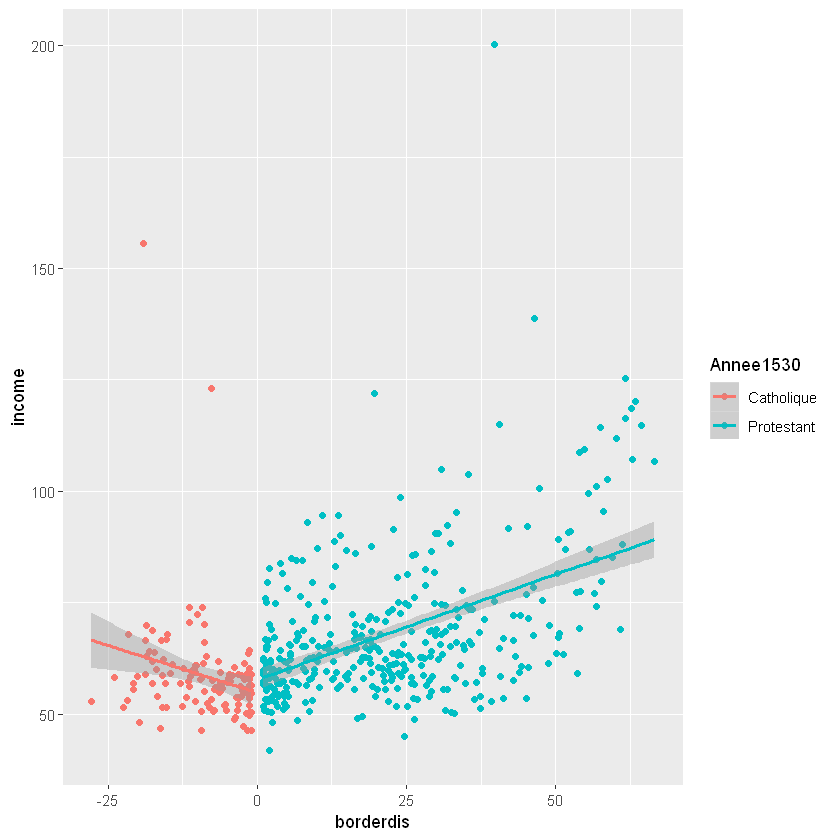

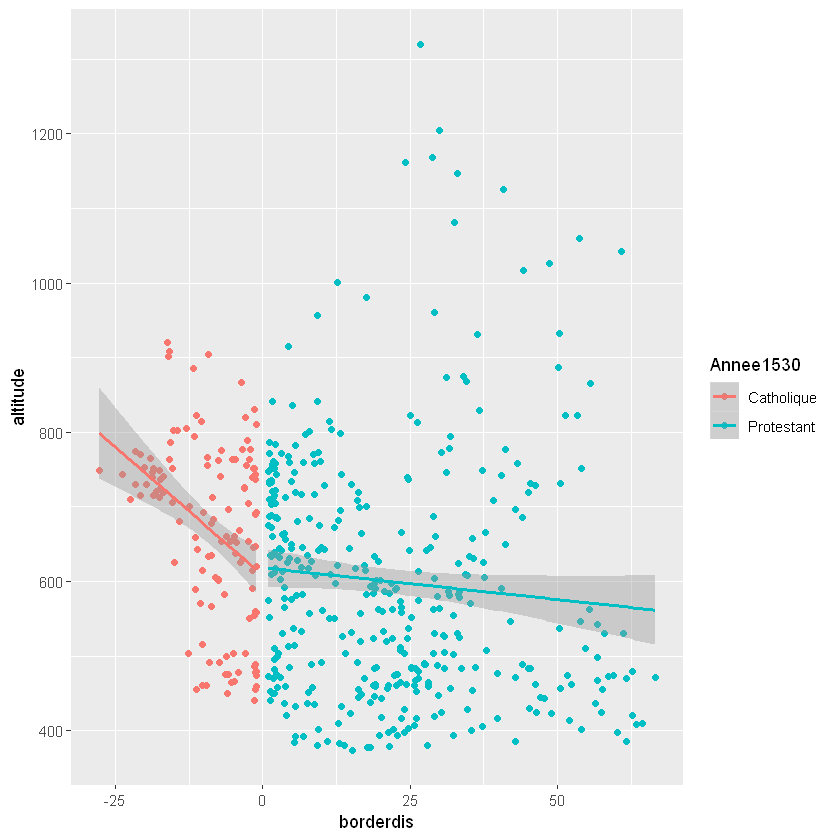

In [11]:
#OPTIONNEL : 
ggplot(d, aes(x = borderdis, y = income,colour=Annee1530)) + 
  geom_point() + stat_smooth(method = "lm")
ggplot(d, aes(x = borderdis, y = altitude,colour=Annee1530)) + 
  geom_point() + stat_smooth(method = "lm")

<font color = green> Pas de discontinuité au seuil pour ces variables de contrôle. Notons qu'effectivement pus on s'éloigne plus les groupes diffèrent en terme de leurs caractéristiques (altitude, revenu...). Il ne serait pas opportun de comparer les communes trops distantes qui ne sont pas de bons contrefactuels les unes pour les autres. </font>

4. Changer l'option de stat_smooth() **lm** par **loess**. Commentez.

Warning message:
"Removed 5 rows containing missing values (geom_smooth)."

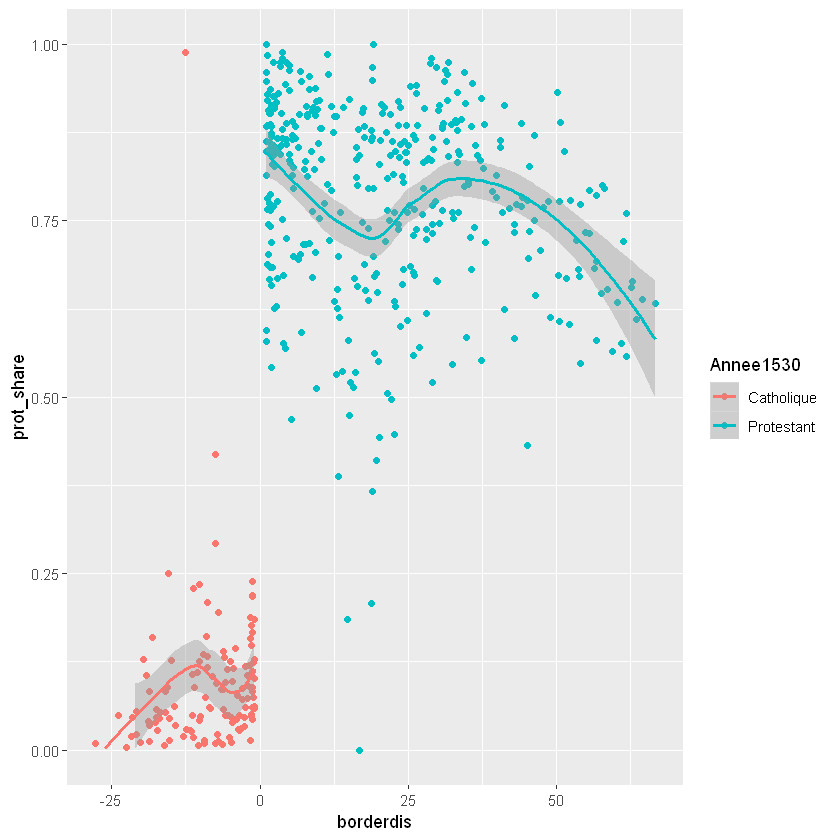

In [12]:
ggplot(d, aes(x = borderdis, y = prot_share,colour=Annee1530)) + 
  geom_point() + ylim(0,1) + stat_smooth(method = "loess")

<font color=green> LOESS est une méthode de régression non paramétrique, qui permet de fitter des données de manière non linéaire. Graphique vraiment canon. 

WIKIPEDIA : La régression locale, ou LOESS, est une méthode de régression non paramétrique fortement connexe qui combine plusieurs modèles de régression multiple au sein d'un méta-modèle qui repose sur la méthode des k plus proches voisins. « LOESS » est un acronyme qui peut être compris comme signifiant, en anglais, « LOcally weighted Scatterplot Smoother ».

La régression locale est une alternative possible aux méthodes habituelles de régression, comme la régression par les moindres carrés linéaire ou non linéaire, dans les cas où ces dernières s'avèrent mal adaptées. Elle combine la simplicité de régression linéaire par les moindres carrés avec la flexibilité de la régression non linéaire, en effectuant une régression simple sur des sous-ensembles locaux de données. L'un des principaux avantages de cette méthode est qu'elle rend inutile la définition d'une unique fonction globale qui décrirait le modèle de régression, puisque la méthode consiste à calculer autant de fonctions locales qu'il y a de segments de données. 

</font>